# Make plot of OMMBV Basis along Magnetic Field Line Traces

In [16]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pds

In [17]:
import OMMBV
import pysat

In [70]:
# Define some plot locations
p_long = np.arange(0., 360., 36.)
p_alt = 0 * p_long + 550.
p_lats = 0 * p_long + 30.

Tracing field.
Calculating basis.
Tracing field.
Calculating basis.
Tracing field.
Calculating basis.
Tracing field.
Calculating basis.
Tracing field.
Calculating basis.
Tracing field.
Calculating basis.
Tracing field.
Calculating basis.
Tracing field.
Calculating basis.
Tracing field.
Calculating basis.
Tracing field.
Calculating basis.


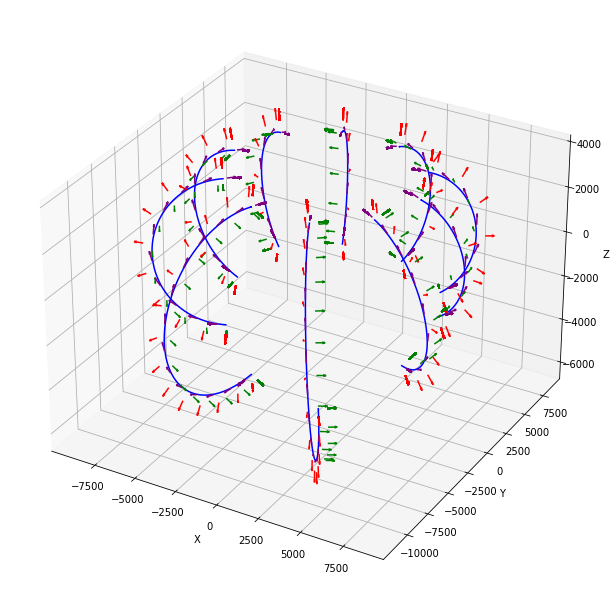

In [79]:
fig = plt.figure(figsize=(8.5, 8.5))
ax = fig.add_subplot(111, projection='3d')

# Set date for the magnetic field
date = dt.datetime(2000, 1, 1)

# Convert supplied geocentric locations into Earth Centered Earth Fixed locations
ecef_x, ecef_y, ecef_z = OMMBV.trans.geocentric_to_ecef(p_lats, 
                                                        p_long, 
                                                        p_alt)

# For each location, plot a field line and the basis vectors along it
for j, (x, y, z) in enumerate(zip(ecef_x, ecef_y, ecef_z)):

    # Perform full field line traces down to altitude of 250 km
    print('Tracing field.')
    trace = OMMBV.trace.full_field_line(np.array([x, y, z]), date, 250.) 

    # Plot magnetic field-line passing through input location
    ax.plot(trace[:, 0], trace[:, 1], trace[:, 2], 'b')
    ax.set_zlabel('Z')

    # Downselect, reduce number of points
    trace = trace[::13, :]

    # Compute magnetic field vectors. Need to provide alt, latitude, 
    # and longitude in geodetic coords. Perform conversion.
    latitude, longitude, altitude = OMMBV.trans.ecef_to_geodetic(trace[:, 0], 
                                                                 trace[:, 1], 
                                                                 trace[:, 2])

    # Calculate magnetic vector basis
    print('Calculating basis.')
    basis = OMMBV.calculate_geomagnetic_basis(latitude, longitude, altitude, 
                                              [date] * len(trace[:, 0]))

    # Plot zonal unit vector
    length = 500
    vx = basis['zon_x']
    vy = basis['zon_y']
    vz = basis['zon_z']
    ax.quiver3D(trace[:, 0] + length*vx, 
                trace[:, 1] + length*vy,
                trace[:, 2] + length*vz, 
                vx, vy, vz, length=500.,
                color='green')

    # Plot field-aligned unit vector
    length = 500
    vx = basis['fa_x']
    vy = basis['fa_y']
    vz = basis['fa_z']
    ax.quiver3D(trace[:, 0] + length*vx, 
                trace[:, 1] + length*vy,
                trace[:, 2] + length*vz, 
                vx, vy, vz, length=500.,
                color='purple')

    # Plot meridional unit vector
    length = 500
    vx = basis['mer_x']
    vy = basis['mer_y']
    vz = basis['mer_z']
    ax.quiver3D(trace[:, 0] + length*vx, 
                trace[:, 1] + length*vy,
                trace[:, 2] + length*vz, 
                vx, vy, vz, length=500.,
                color='red')
    

plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()